In [41]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Exploration:

## Available functions:

    #feature_plot(X): Takes an input matrix of Dimensions NxD and plots the histogram showing the data distribution for each of the columns.
    
    #compute_correlation(X,y):Takes in an input matrix X of Dimensions NxD and computes the correlation oef each column with vector y and returns a vector with each correlation value.
    
    #correlation_plot(X,y,title=''): Performs compute_correlation(X,y) and then plots the correlation value versus the feature column id.
    
    #observe_feature_classification(X,y): Observe the feature versus the output classification in case there is a clear distinction.

## Data Preprocessing:

## Available functions:

      #clean_up_invalid_values_mean(col_x, invalid_value=-999): Takes an input column, and replaces the specified invalid value with the column mean when the invalid value is removed.
      
       #clean_up_invalid_values_median(col_x, invalid_value=-999):Takes an input column, and replaces the specified invalid value with the column mean when the invalid value is removed.
       
       #change_discrete(tX,col): Takes in a matrix input, and the id of the discrete column that is to be split into binary features. Returns a matrix with the column removed and the binary features classification appended at end as mulitple features.
       
       #normalize_data(X): Takes an input matrix and scales each feature column between 0 and 1 using the minimum and maximum values,
       #regular_standardize(x, mean_x=None, std_x=None): Takes in a matrix x and standardizes each column by subtrcting the mean and dividing by the std.
       
       #pedro_preprocess(X): Takes in matrix X and performs various standardizations on each column

## Load the training data into feature matrix, class labels, and event ids:

In [42]:
from proj1_helpers import *
DATA_TRAIN_PATH = "train.csv"  
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [106]:
from our_helpers import *
# y : Main input Train Classifications
#tX: Main input features matrix (250000x30)
#ids: id of each feature

## Play Time:

In [44]:
#feature_plot(tX)

In [45]:
#plot_number_invalid_values(tX)

In [46]:
#observe_feature_classification(tX,y)

In [47]:
# Comment: There appears to be no clear classifier feature

(array([14, 15, 17, 18], dtype=int64),)

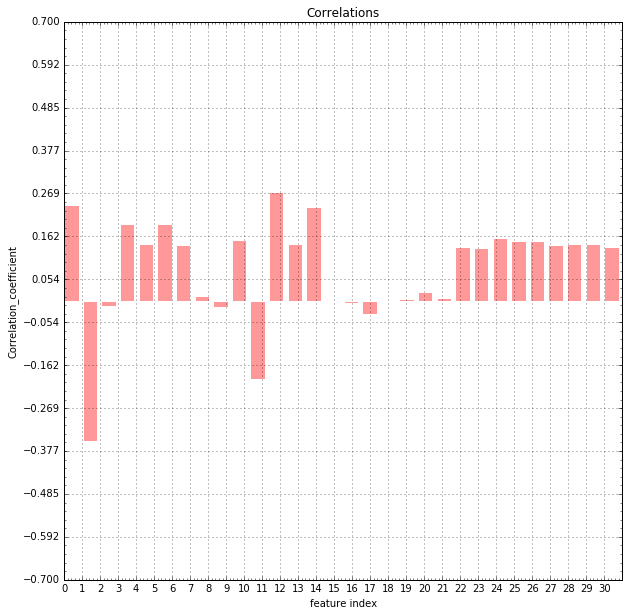

In [48]:
correlation_plot(tX,y,'Correlations')
determine_uncorrelated_features(tX,y)

## Process the input Matrix tX

#1 Perform Pedro_Preprocessing:
Create binary classification of missing values
binarize featre 11
replace feature 22 by 4 classifications (22,23,24,25)
scale and standardize other features


In [49]:
X1=pedro_preprocess(tX)

In [50]:
#print(X1.shape)



(array([14, 15, 17, 18], dtype=int64),)

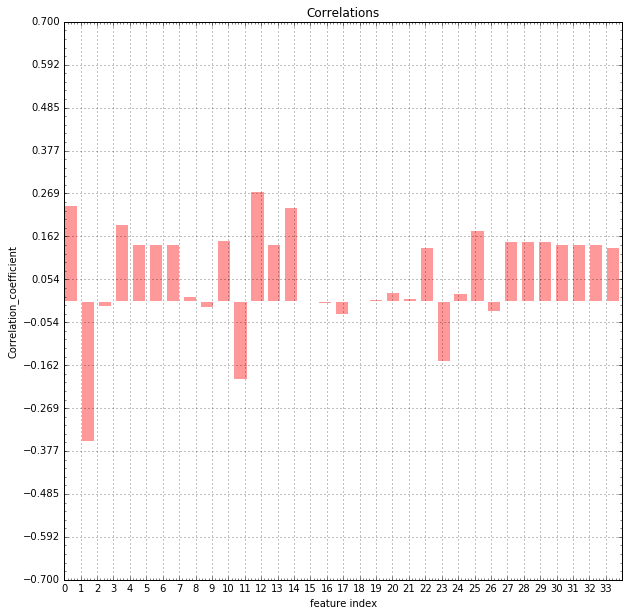

In [51]:
correlation_plot(X1,y,'Correlations')
determine_uncorrelated_features(X1,y)

#2 Perform Mean_Replacement_Preprocessing:
Replace missing values by mean
replace feature 22 by 4 classifications (30,31,32,33)
scale and standardize all features

In [52]:
print(X1[0:250:1,30])

[ 1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.
  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  1.  1

In [61]:
X2=mean_replace(tX)
X2=change_discrete(X2,22)
X2=normalize_data(X2)
X2=regular_standardize(X2)

(array([14, 15, 17, 18, 23, 24, 26, 27], dtype=int64),)

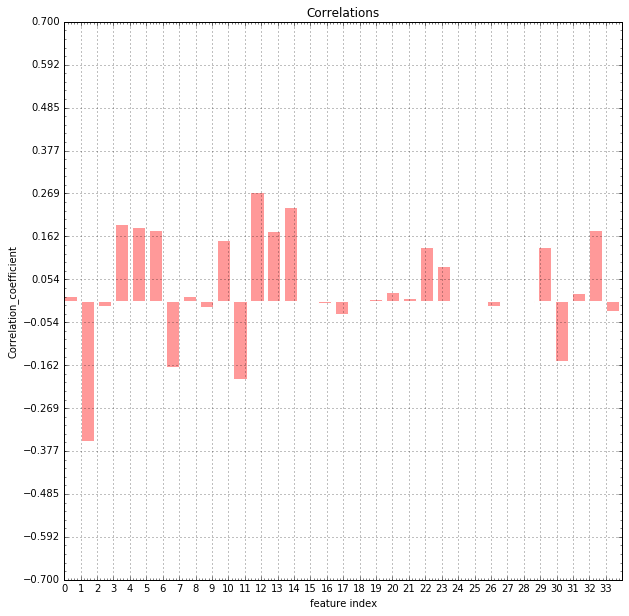

In [62]:
correlation_plot(X2,y,'Correlations')
determine_uncorrelated_features(X2,y)

In [66]:
X3=median_replace(tX)
X3=change_discrete(X3,22)
X3=normalize_data(X3)
X3=regular_standardize(X3)

(array([14, 15, 17, 18, 23, 24, 26, 27], dtype=int64),)

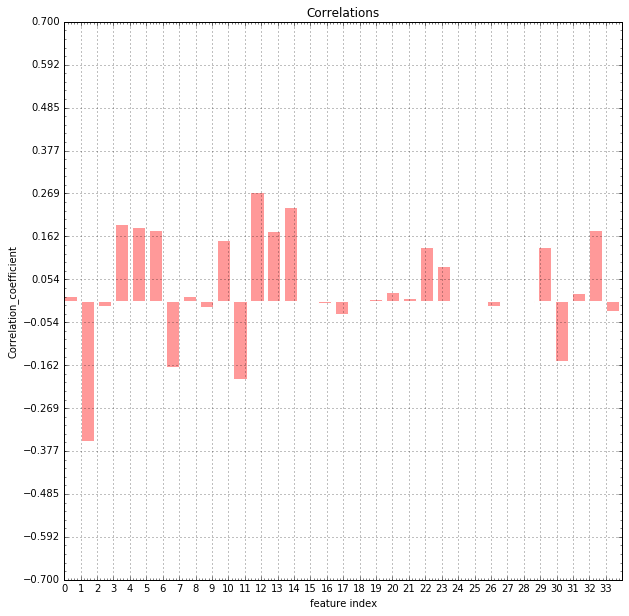

In [67]:
correlation_plot(X3,y,'Correlations')
determine_uncorrelated_features(X3,y)

## TESTS

In [69]:
from ToolBox import *

In [75]:
DATA_TEST_PATH = "test.csv" # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

X1_test=pedro_preprocess(tX_test)
weight=ridge_regression(y,X1,0.0001)
print(weight)

In [116]:
X2_test=mean_replace(tX_test)
X2_test=change_discrete(X2_test,22)
X2_test=normalize_data(X2_test)
X2_test=regular_standardize(X2_test)
X2_test=remove_columns(X2_test,[14,15,17,18])

In [117]:
X2_remove_uncorr=remove_columns(X2,[14,15,17,18])
print(X2_remove_uncorr.shape)
max_iters = 1000
gamma = 0.2
w_initial = np.zeros((X2_remove_uncorr.shape[1]))
gradient_losses, gradient_ws = gradient_descent(y, X2_remove_uncorr, w_initial, max_iters, gamma)
weight=gradient_ws[max_iters-1]
print(len(weight))

(250000, 29)
0.387480218106
29


In [118]:
OUTPUT_PATH = "submission5.csv" # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weight, X2_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)